# RNetwork Visualization - Maze

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
import torch
import numpy as np

from tqdm import tqdm
from omegaconf import OmegaConf

import offline_gcrl.envs as envs
import offline_gcrl.utils as utils

from offline_gcrl.rnet import RNetModel, RNetMemory, rnet_utils
from offline_gcrl.exploration_buffer import ExplorationBuffer

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Config Utils

In [5]:
cfg_path = f"../conf/config.yaml"

env_name = 'maze_U4rooms'

cfg = OmegaConf.load(cfg_path)
env_cfg = OmegaConf.load(f'../conf/env/{env_name}.yaml')
cfg = OmegaConf.merge(cfg, env_cfg)


space_info = utils.get_space_info(cfg.env.obs, cfg.env.action_dim)
device = torch.device("cuda:0")

/private/home/linamezghani/.conda/envs/polybeast/lib/python3.7/site-packages/omegaconf/resolvers/__init__.py:13: UserWarning: The `env` resolver is deprecated, see https://github.com/omry/omegaconf/issues/573
  "The `env` resolver is deprecated, see https://github.com/omry/omegaconf/issues/573"


In [6]:
env = envs.make_env(cfg.env, space_info)

points = env.generate_points(30, random=False)

## Load

In [7]:
model = RNetModel(cfg.rnet.model, space_info)

In [8]:
memory = RNetMemory(cfg.rnet.memory, space_info, model.feat_size, device)

In [33]:
exp_name = '20220920-081223_maze_U4rooms_ours_s345_r0'
save_dir = os.path.join('/checkpoint/linamezghani/offline-gcrl/logs/', exp_name)

#save_dir = '/checkpoint/linamezghani/offline-gcrl/logs/20220614-090425_maze_U4rooms_rnet_sym_new_s234_r0/'

memory, model = rnet_utils.load(save_dir, memory, model)

Loading rnet objects from  /checkpoint/linamezghani/offline-gcrl/logs/20220920-081223_maze_U4rooms_ours_s345_r0


In [34]:
print(memory.nn_in)

[[  0   0   0 ...   8   8   8]
 [ 15  15  15 ...  48  48  48]
 [262  21 107 ...  47  30  30]
 ...
 [ 66  67  67 ...  92  92  92]
 [ 55 230  55 ... 192 192 192]
 [ 46  46  46 ... 267 153  14]]


## Visualize

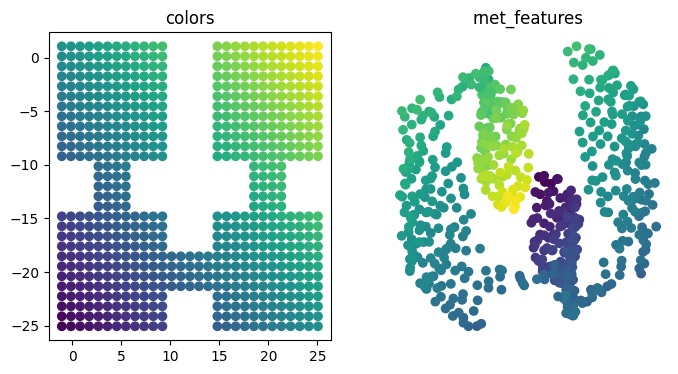

In [35]:
model.eval()
model.to("cpu")
fig = env.plot_embeddings(model, points['state'][:, :], points['state'][:, :],
                          show_colors=True)

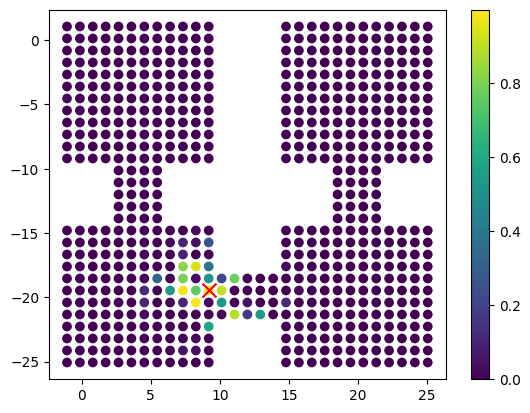

In [36]:
i = np.random.randint(0, points['state'][:, :3].shape[0])
fig = env.plot_values(model, points['state'][:, :3][i], points['state'][:, :3][i], points['state'][:, :3],
                      points['state'][:, :3], sigmoid=True)

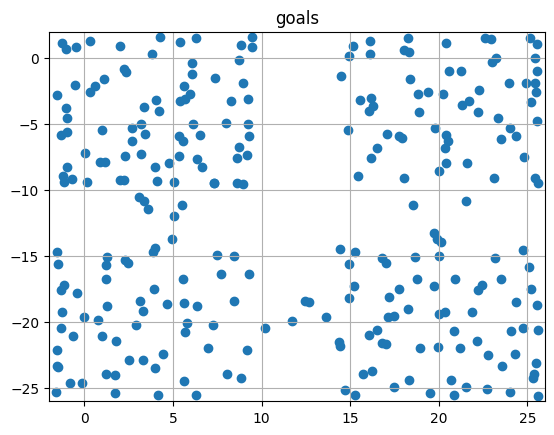

In [37]:
env.set_goals(memory.get_goals())
fig = env.plot_goals()

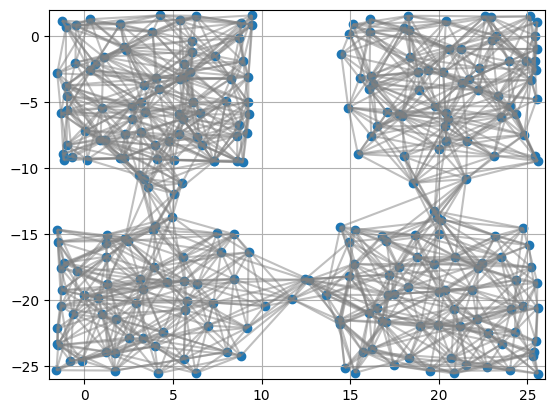

In [38]:
fig = env.plot_graph(memory)

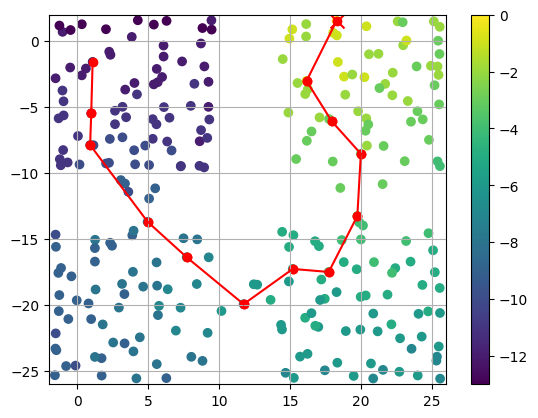

In [39]:
fig = env.plot_graph_dist(memory)